In [2]:
import matplotlib.pyplot as plt
import matplotlib as matplt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import math
import statistics
import tables

np.set_printoptions(precision=3, suppress=True)

from matplotlib.gridspec import GridSpec

In [2]:
print (np.__version__)
print (pd.__version__)
print (sns.__version__)
print (matplt.__version__)
print (tables.__version__)

1.22.3
1.4.1
0.11.2
3.5.1
3.7.0


# NOMIG

In [4]:
IrrGEMM_0_hd5 = pd.HDFStore("./traces/Irr_GEMM-0.prof.h5")
IrrGEMM_0_events = IrrGEMM_0_hd5.events
IrrGEMM_0_hd5.close()

In [5]:
IrrGEMM_1_hd5 = pd.HDFStore("./traces/Irr_GEMM-1.prof.h5")
IrrGEMM_1_events = IrrGEMM_1_hd5.events
IrrGEMM_1_hd5.close()


In [6]:
IrrGEMM_2_hd5 = pd.HDFStore("./traces/Irr_GEMM-2.prof.h5")
IrrGEMM_2_events = IrrGEMM_2_hd5.events
IrrGEMM_2_hd5.close()


In [7]:
IrrGEMM_3_hd5 = pd.HDFStore("./traces/Irr_GEMM-3.prof.h5")
IrrGEMM_3_events = IrrGEMM_3_hd5.events
IrrGEMM_3_hd5.close()


In [9]:

IrrGEMM_3_events['taskpool_id'].unique()


array([2, 4, -1, 6, 8, 10, 12], dtype=object)

In [10]:
def filter_data_frame(df):
   
    df = df.astype(float)
    

    # remove the first run (warmup run)
    df = df.loc[ df['taskpool_id'] == 6 ] 

    #Change all timimng values fron ns to ms
    
    df.reset_index(drop=True, inplace=True)
    
    
    return df





In [54]:
list(IrrGEMM_0.columns)

['g',
 'nb_first_stage_in_h2d',
 'rp',
 'mcp',
 'select_time',
 'complete_time',
 'first_stage_in_time_end',
 'tp_nb_tasks',
 'sec_stage_in_time_start',
 'nb_sec_stage_in_d2d',
 'node_id',
 'k',
 'sec_waiting_tasks',
 'nb_first_stage_in',
 'p',
 'mrp',
 'begin',
 'cp',
 'task_progress',
 'complete_time_end',
 'mp',
 'type',
 'exec_time_start',
 'task_type',
 'stage_out_time_start',
 'dc_dataid',
 'first_waiting_tasks',
 'clock_speed',
 'taskpool_id',
 'nb_sec_stage_in_h2d',
 'second_queue_time',
 'ready_tasks',
 'exec_stream_index',
 'mig_status',
 'stream_id',
 'prank',
 'qrank',
 'task_count',
 'device_index',
 'id',
 'first_queue_time',
 'tcid',
 'dc_key',
 'n',
 'exec_time_end',
 'class_id',
 'first_stage_in_time_start',
 'complete_time_start',
 'trc',
 'stage_out_time_end',
 'nb_sec_stage_in',
 'nb_first_stage_in_d2d',
 'mrp_p',
 'end',
 'priority',
 'sec_stage_in_time_end',
 'flags',
 'm',
 'src',
 'dst',
 'tid',
 'tpid',
 'msg_size',
 'size',
 'knext',
 'kprev',
 'dc_padding',
 

In [12]:
IrrGEMM_0 = filter_data_frame(IrrGEMM_0_events)


In [13]:
IrrGEMM_0.head()


,g,nb_first_stage_in_h2d,rp,mcp,select_time,complete_time,first_stage_in_time_end,tp_nb_tasks,sec_stage_in_time_start,nb_sec_stage_in_d2d,...,dst,tid,tpid,msg_size,size,knext,kprev,dc_padding,data_key,dc_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1.045214e+11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
IrrGEMM_1 = filter_data_frame(IrrGEMM_1_events)

In [15]:
IrrGEMM_0['ready_tasks'].unique()

array([  nan,    0.,  176., ..., 3231., 3103., 3052.])

Text(0.5, 0, 'Execution time(ns)')

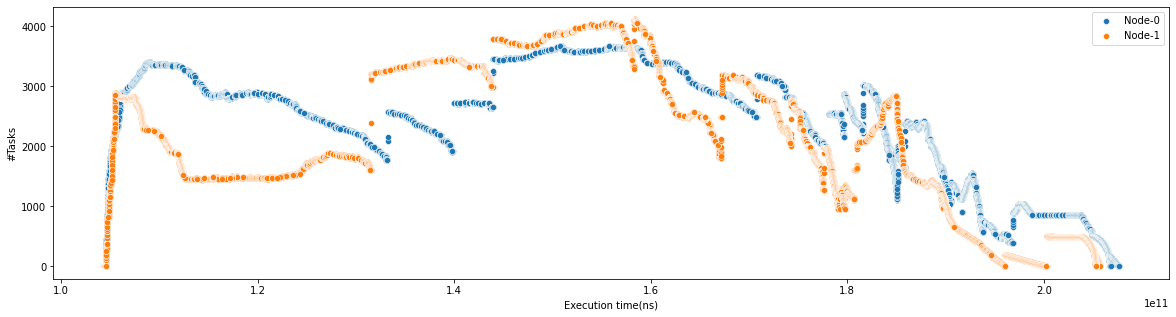

In [16]:


fig = plt.figure(figsize=(20, 5))
gs = GridSpec(nrows=1, ncols=1)



ax0 = fig.add_subplot(gs[0, 0])
sns.scatterplot(data=IrrGEMM_0, x="complete_time", y="ready_tasks", ax=ax0, label='Node-0')
sns.scatterplot(data=IrrGEMM_1, x="complete_time", y="ready_tasks", ax=ax0, label='Node-1')
ax0.set_ylabel('#Tasks')
ax0.set_xlabel('Execution time(ns)')
#plt.legend([],[], frameon=False)




#fig.savefig('Irr_GEMM.png', dpi=300, bbox_inches='tight')



# MIG

In [2]:
IrrGEMM_mig_0_hd5 = pd.HDFStore("./traces/Irr_GEMM_steal-0.prof.h5")
IrrGEMM_mig_0_events = IrrGEMM_mig_0_hd5.events
#IrrGEMM_mig_0_event_infos =  IrrGEMM_mig_0_hd5.event_infos
IrrGEMM_mig_0_hd5.close()


AttributeError: 'HDFStore' object has no attribute 'event_infos'

In [4]:
IrrGEMM_mig_0_hd5.keys()

['/errors',
 '/event_attributes',
 '/event_convertors',
 '/event_names',
 '/event_types',
 '/events',
 '/information',
 '/nodes',
 '/streams']

In [6]:
IrrGEMM_mig_0_hd5.event_types

N/A                                                0
TASK_MEMORY                                        1
Device delegate                                    2
RELEASE_DEPS                                       3
ACTIVATE_CB                                        4
DATA_FLUSH                                         5
GPU_TASK_COUNT                                     6
cuda                                               7
movein                                             8
moveout                                            9
prefetch                                          10
gpu_mem_alloc                                     11
gpu_mem_use                                       12
NODE_GPU_TASK_COUNT                               13
NODE_ALL_TASK_COUNT                               14
REQ_RECVD                                         15
REQ_SEND                                          16
REQ_INIT                                          17
MPI_ACTIVATE                                  

In [7]:
list(IrrGEMM_mig_0_events.columns)

['size',
 'node_id',
 'stream_id',
 'taskpool_id',
 'type',
 'begin',
 'end',
 'flags',
 'id',
 'm',
 'mrp_p',
 'device_index',
 'task_progress',
 'launched_tasks',
 'class_id',
 'first_stage_in_time_end',
 'data_key',
 'tp_nb_tasks',
 'stage_out_time_start',
 'task_count',
 'exec_time_start',
 'task_type',
 'tid',
 'ready_tasks',
 'p',
 'trc',
 'cp',
 'mp',
 'priority',
 'req_recv_time',
 'dc_dataid',
 'rp',
 'tpid',
 'req_mutex',
 'select_time',
 'req_init_time',
 'first_queue_time',
 'k',
 'sec_stage_in_time_start',
 'complete_time_end',
 'qrank',
 'exec_time_end',
 'g',
 'mcp',
 'src',
 'mrp',
 'prank',
 'msg_size',
 'nb_sec_stage_in_h2d',
 'first_waiting_tasks',
 'sec_waiting_tasks',
 'req_send_time',
 'nb_first_stage_in',
 'second_queue_time',
 'sec_stage_in_time_end',
 'nb_sec_stage_in',
 'mig_status',
 'dc_id',
 'dc_key',
 'kprev',
 'first_stage_in_time_start',
 'gpu_tasks',
 'dc_padding',
 'nb_sec_stage_in_d2d',
 'knext',
 'exec_stream_index',
 'stage_out_time_end',
 'nb_first

In [ ]:
IrrGEMM_mig_1_hd5 = pd.HDFStore("./traces/Irr_GEMM_steal-1.prof.h5")
IrrGEMM_mig_1_events = IrrGEMM_mig_1_hd5.events
IrrGEMM_mig_1_hd5.close()


In [ ]:
list(IrrGEMM_mig_1_events.columns)

In [ ]:
list(IrrGEMM_mig_1_event_infos.columns)

In [11]:
IrrGEMM_mig_2_hd5 = pd.HDFStore("./traces/Irr_GEMM_mig-3.prof.h5")


In [12]:
IrrGEMM_mig_2_events = IrrGEMM_mig_2_hd5.events



In [13]:
list(IrrGEMM_mig_2_events.columns)

['ready_tasks',
 'complete_time',
 'trc',
 'task_progress',
 'flags',
 'qrank',
 'dc_key',
 'g',
 'knext',
 'begin',
 'priority',
 'tid',
 'gpu_tasks',
 'rp',
 'p',
 'tp_nb_tasks',
 'tpid',
 'cp',
 'dc_dataid',
 'node_id',
 'taskpool_id',
 'id',
 'end',
 'kprev',
 'type',
 'stream_id',
 'dst',
 'tcid',
 'm',
 'n',
 'prank',
 'recv_time',
 'msg_size',
 'size',
 'k',
 'src',
 'mrp_p',
 'mp',
 'clock_speed',
 'sec_waiting_tasks',
 'select_time',
 'exec_time_end',
 'first_stage_in_time_end',
 'device_index',
 'first_waiting_tasks',
 'task_count',
 'stage_out_time_start',
 'mig_status',
 'first_queue_time',
 'exec_stream_index',
 'exec_time_start',
 'nb_sec_stage_in_h2d',
 'nb_first_stage_in',
 'nb_sec_stage_in',
 'nb_first_stage_in_d2d',
 'first_stage_in_time_start',
 'complete_time_start',
 'stage_out_time_end',
 'class_id',
 'nb_first_stage_in_h2d',
 'sec_stage_in_time_start',
 'nb_sec_stage_in_d2d',
 'task_type',
 'second_queue_time',
 'sec_stage_in_time_end',
 'complete_time_end']

In [5]:
IrrGEMM_mig_2_event_infos =  IrrGEMM_mig_1_hd5.event_infos

NameError: name 'IrrGEMM_mig_1_hd5' is not defined

In [9]:
IrrGEMM_mig_2_hd5.keys()

['/errors',
 '/event_attributes',
 '/event_convertors',
 '/event_names',
 '/event_types',
 '/events',
 '/information',
 '/nodes',
 '/streams']

In [10]:
IrrGEMM_mig_2_hd5.event_types

N/A                                                0
TASK_MEMORY                                        1
Device delegate                                    2
RELEASE_DEPS                                       3
ACTIVATE_CB                                        4
DATA_FLUSH                                         5
GPU_TASK_COUNT                                     6
cuda                                               7
movein                                             8
moveout                                            9
prefetch                                          10
gpu_mem_alloc                                     11
gpu_mem_use                                       12
NODE_GPU_TASK_COUNT                               13
NODE_ALL_TASK_COUNT                               14
REQ_RECVD                                         15
MPI_ACTIVATE                                      16
MPI_DATA_CTL                                      17
MPI_DATA_PLD_SND                              

In [ ]:
IrrGEMM_mig_2_hd5.close()

In [ ]:
IrrGEMM_mig_3_hd5 = pd.HDFStore("./traces/Irr_GEMM_mig-3.prof.h5")
IrrGEMM_mig_3_events = IrrGEMM_mig_3_hd5.events
IrrGEMM_mig_3_hd5.close()


In [9]:
IrrGEMM_mig_0_events['ready_tasks'].unique()

KeyError: 'ready_tasks'

ValueError: Could not interpret value `req_init_time` for parameter `x`

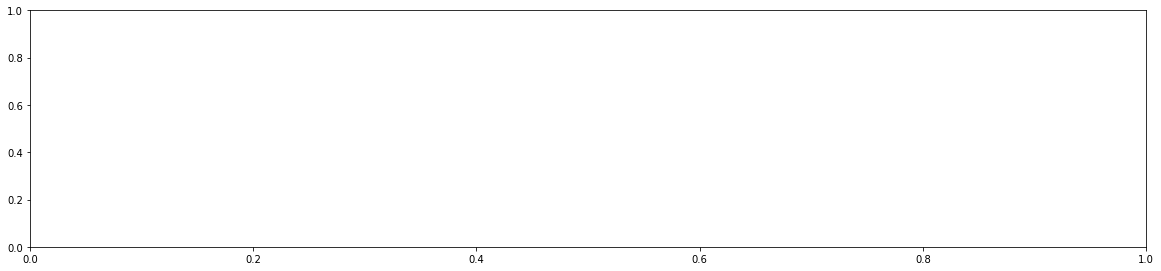

In [7]:

fig = plt.figure(figsize=(20, 20))
gs = GridSpec(nrows=4, ncols=1)



ax0 = fig.add_subplot(gs[0, 0])



sns.scatterplot(data=IrrGEMM_mig_2_events, x="req_init_time", y=6000, ax=ax0, label='Steal Request Initiated')

sns.scatterplot(data=IrrGEMM_mig_2_events, x="req_send_time", y=7000, ax=ax0, label='Steal Request Sent')

sns.scatterplot(data=IrrGEMM_mig_2_events, x="req_recv_time", y=8000, ax=ax0, label='Steal Request Recieved')

sns.scatterplot(data=IrrGEMM_mig_2_events, x="complete_time", y="ready_tasks", ax=ax0, label='Launched GPU tasks')

sns.scatterplot(data=IrrGEMM_mig_2_events, x="task_progress", y="tp_nb_tasks", ax=ax0, label='Ready GPU+CPU tasks')

ax0.set_ylabel('#Tasks')
ax0.set_xlabel('Execution time(ns)')
#plt.legend([],[], frameon=False)

In [ ]:


fig = plt.figure(figsize=(20, 20))
gs = GridSpec(nrows=4, ncols=1)



ax0 = fig.add_subplot(gs[0, 0])



sns.scatterplot(data=IrrGEMM_mig_0_events, x="req_init_time", y=6000, ax=ax0, label='Steal Request Initiated')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="req_send_time", y=7000, ax=ax0, label='Steal Request Sent')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="req_recv_time", y=8000, ax=ax0, label='Steal Request Recieved')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="complete_time", y="ready_tasks", ax=ax0, label='Launched GPU tasks')

sns.scatterplot(data=IrrGEMM_mig_0_events, x="task_progress", y="tp_nb_tasks", ax=ax0, label='Ready GPU+CPU tasks')

ax0.set_ylabel('#Tasks')
ax0.set_xlabel('Execution time(ns)')
#plt.legend([],[], frameon=False)

ax1 = fig.add_subplot(gs[1, 0])


sns.scatterplot(data=IrrGEMM_mig_1_events, x="req_init_time", y=6000, ax=ax1, label='Steal Request Initiated')

sns.scatterplot(data=IrrGEMM_mig_1_events, x="req_send_time", y=7000, ax=ax1, label='Steal Request Sent')

sns.scatterplot(data=IrrGEMM_mig_1_events, x="req_recv_time", y=8000, ax=ax1, label='Steal Request Recieved')

sns.scatterplot(data=IrrGEMM_mig_1_events, x="complete_time", y="ready_tasks", ax=ax1, label='Launched GPU tasks')

sns.scatterplot(data=IrrGEMM_mig_1_events, x="task_progress", y="tp_nb_tasks", ax=ax1, label='Ready GPU+CPU tasks')



ax1.set_ylabel('#Tasks')
ax1.set_xlabel('Execution time(ns)')

ax2 = fig.add_subplot(gs[2, 0])


sns.scatterplot(data=IrrGEMM_mig_2_events, x="req_init_time", y=6000, ax=ax2, label='Steal Request Initiated')

sns.scatterplot(data=IrrGEMM_mig_2_events, x="req_send_time", y=7000, ax=ax2, label='Steal Request Sent')

sns.scatterplot(data=IrrGEMM_mig_2_events, x="req_recv_time", y=8000, ax=ax2, label='Steal Request Recieved')

sns.scatterplot(data=IrrGEMM_mig_2_events, x="complete_time", y="ready_tasks", ax=ax2, label='Launched GPU tasks')

sns.scatterplot(data=IrrGEMM_mig_2_events, x="task_progress", y="tp_nb_tasks", ax=ax2, label='Ready GPU+CPU tasks')



ax2.set_ylabel('#Tasks')
ax2.set_xlabel('Execution time(ns)')


ax3 = fig.add_subplot(gs[3, 0])


sns.scatterplot(data=IrrGEMM_mig_3_events, x="req_init_time", y=6000, ax=ax3, label='Steal Request Initiated')

sns.scatterplot(data=IrrGEMM_mig_3_events, x="req_send_time", y=7000, ax=ax3, label='Steal Request Sent')

sns.scatterplot(data=IrrGEMM_mig_3_events, x="req_recv_time", y=8000, ax=ax3, label='Steal Request Recieved')

sns.scatterplot(data=IrrGEMM_mig_3_events, x="complete_time", y="ready_tasks", ax=ax3, label='Launched GPU tasks')

sns.scatterplot(data=IrrGEMM_mig_3_events, x="task_progress", y="tp_nb_tasks", ax=ax3, label='Ready GPU+CPU tasks')


ax3.set_ylabel('#Tasks')
ax3.set_xlabel('Execution time(ns)')





#fig.savefig('Irr_GEMM.png', dpi=300, bbox_inches='tight')

